# NLP Project : Using the tweets from twitter, prediction of winning chances for Narendra Modi vs Rahul Gandhi

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("noorsaeed/indian-election-sentiment-dataset-tweets")

print("Path to dataset files:", path)

100%|██████████| 3.69M/3.69M [00:00<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/noorsaeed/indian-election-sentiment-dataset-tweets/versions/1


In [2]:
!ls $path

modi_reviews.csv  rahul_reviews.csv


In [5]:
import pandas as pd

modi = pd.read_csv(f"{path}/modi_reviews.csv")
gandhi = pd.read_csv(f"{path}/rahul_reviews.csv")

In [6]:
modi

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...
...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ..."


In [7]:
gandhi

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...
...,...,...,...
14256,14256,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ..."
14257,14257,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...
14258,14258,RAMANKAIRA,@sherryontopp Early morning #political move af...
14259,14259,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...


In [8]:
import numpy as np
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

Here’s how each library can be used in the context of **election sentiment analysis**:

1. **TextBlob**:  
   - Used for natural language processing tasks, such as calculating sentiment polarity (positive, negative, neutral) from election-related text data.

   Example:
   ```python
   sentiment = TextBlob("The candidate is promising and reliable.").sentiment.polarity
   ```

2. **Plotly Graph Objects (`go`)**:  
   - Provides a low-level interface for creating customizable and complex visualizations like bar charts, pie charts, and scatter plots to display election sentiment data.

   Example:
   ```python
   fig = go.Figure(data=[go.Bar(x=['Positive', 'Negative'], y=[50, 30])])
   fig.show()
   ```

3. **Plotly Express (`xp`)**:  
   - A high-level interface for quickly creating visualizations like scatter plots, line graphs, and heatmaps for analyzing and presenting election sentiment trends.

   Example:
   ```python
   fig = xp.bar(df, x='Candidate', y='Positive Sentiment', color='Party')
   fig.show()
   ```



In [10]:
modi.shape, gandhi.shape

((25688, 3), (14261, 3))

In [15]:
modi['Tweet'][3]

'PM Modi creates a new record of being the only PM of a democratic country. \nCongratulations our pm welcome to the Heart of India again 🙏🙏🙏🙏🙏🙏🙏 .#Elections2019 #PMModi #DeshKaGauravModi #2020Election #BJP #India'

In [16]:
TextBlob(modi['Tweet'][3]).sentiment

Sentiment(polarity=0.31212121212121213, subjectivity=0.7848484848484848)

polarity positive = positive comment or review

polarity negative = negative comment or review

In [38]:
gandhi['Tweet'][31]

'@RahulGandhi Yes, as BJP &amp; RSS portrays as the Defenders of Hindu Faith, What they have done for the common Hindu Devotees of this land, I forget all their promises of 2014 as a Citizen of this land but... \nYou Fox 🦊 (#Kurukan) clothed as a sheep with Fake Promises #FoxModi #NarendraModi'

In [37]:
TextBlob(gandhi['Tweet'][31]).sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

A negative comment for Rahul Gandhi, showing you are doing nothing, RSS saved Hindus

In [39]:
modi['Tweet'] = modi['Tweet'].astype(str)
gandhi['Tweet'] = gandhi['Tweet'].astype(str)

def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [43]:
find_polarity("I hate Politics")

-0.8

In [45]:
find_polarity("I love analyzing election data and creating insights from it")

0.5

In [40]:
modi['Polarity'] = modi['Tweet'].apply(find_polarity)
gandhi['Polarity'] = gandhi['Tweet'].apply(find_polarity)

In [41]:
modi

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788
...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000


In [42]:
gandhi.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667


In [46]:
modi['Label'] = np.where(modi['Polarity']>0,'positive','negative')
modi['Label'][modi['Polarity']==0] = 'Neutral'

gandhi['Label'] = np.where(gandhi['Polarity']>0,'positive','negative')
gandhi['Label'][gandhi['Polarity']==0] = 'Neutral'

<ipython-input-46-d9c7fc7874e1>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  modi['Label'][modi['Polarity']==0] = 'Neutral'
<ipython-input-46-d9c7fc7874e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [47]:
modi

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,positive
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,positive
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,positive
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,positive
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,positive
...,...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000,Neutral
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524,positive
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000,negative
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000,Neutral


In [49]:
gandhi

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,positive
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,Neutral
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,Neutral
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,positive
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,negative
...,...,...,...,...,...
14256,14256,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",0.000000,Neutral
14257,14257,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,-0.500000,negative
14258,14258,RAMANKAIRA,@sherryontopp Early morning #political move af...,0.080000,positive
14259,14259,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0.080000,positive


In [51]:
modi['Label'].value_counts()

,count
Label,
positive,12445
Neutral,8207
negative,5036


In [52]:
gandhi['Label'].value_counts()

,count
Label,
positive,6198
Neutral,4894
negative,3169


In [53]:
# % positive and negative sentiments for Modi and Rahul
print(f"Modi's Favourable comment percentage : {round(modi['Label'].value_counts()[0]/modi.shape[0]*100,2)}%")

Modi's Favourable comment percentage : 48.45%


<ipython-input-53-20214c13cc5d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Modi's Favourable comment percentage : {round(modi['Label'].value_counts()[0]/modi.shape[0]*100,2)}%")


In [54]:
# % positive and negative sentiments for Modi and Rahul
print(f"Rahul's Favourable comment percentage : {round(gandhi['Label'].value_counts()[0]/gandhi.shape[0]*100,2)}%")

Rahul's Favourable comment percentage : 43.46%


<ipython-input-54-b70fcca0fb75>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Rahul's Favourable comment percentage : {round(gandhi['Label'].value_counts()[0]/gandhi.shape[0]*100,2)}%")


In [56]:
import matplotlib.pyplot as plt

In [60]:
# Get value counts
label_counts = modi['Label'].value_counts()

<BarContainer object of 3 artists>

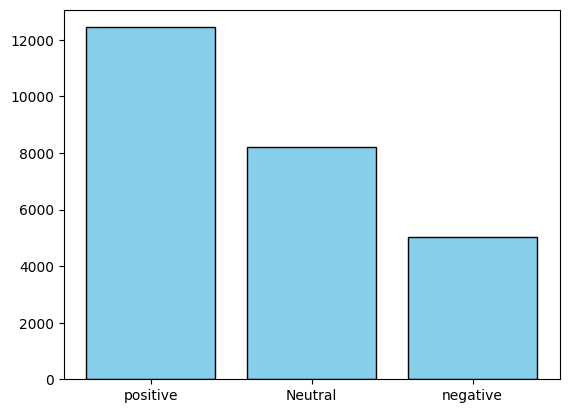

In [61]:
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')

<BarContainer object of 3 artists>

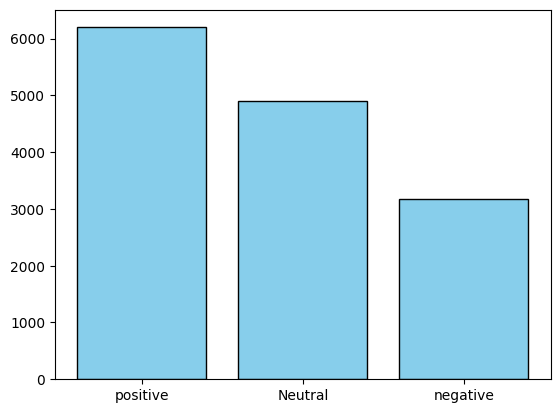

In [62]:
# Get value counts
label_counts = gandhi['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')

Modi's counts:
 Label
positive    12445
neutral      8207
negative     5036
Name: count, dtype: int64
Gandhi's counts:
 Label
positive    6198
neutral     4894
negative    3169
Name: count, dtype: int64

Reindexed Modi's counts:
 Label
positive    12445
negative     5036
neutral      8207
Name: count, dtype: int64
Reindexed Gandhi's counts:
 Label
positive    6198
negative    3169
neutral     4894
Name: count, dtype: int64


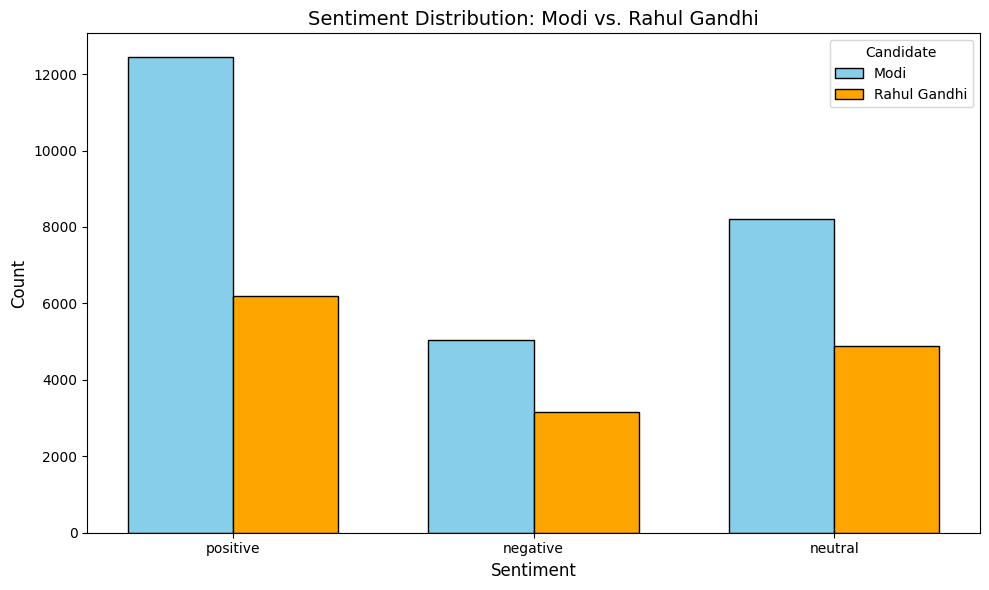

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure labels are consistent (lowercase)
modi['Label'] = modi['Label'].str.lower()
gandhi['Label'] = gandhi['Label'].str.lower()

# Check the value counts for both candidates to verify all categories
modi_counts = modi['Label'].value_counts()
gandhi_counts = gandhi['Label'].value_counts()

# Debugging: Print counts before filling missing categories
print("Modi's counts:\n", modi_counts)
print("Gandhi's counts:\n", gandhi_counts)

# Categories that should be present
categories = ['positive', 'negative', 'neutral']

# Reindex both counts to include all categories (filling missing categories with 0)
modi_counts = modi_counts.reindex(categories, fill_value=0)
gandhi_counts = gandhi_counts.reindex(categories, fill_value=0)

# Debugging: Print counts after reindexing to ensure all categories are present
print("\nReindexed Modi's counts:\n", modi_counts)
print("Reindexed Gandhi's counts:\n", gandhi_counts)

# Set up the positions for the bars
x = np.arange(len(categories))  # Positions for categories
width = 0.35  # Width of the bars

# Create the grouped bar chart
plt.figure(figsize=(10, 6))

# Plot the bars for Modi and Gandhi
plt.bar(x - width/2, modi_counts, width, label='Modi', color='skyblue', edgecolor='black')
plt.bar(x + width/2, gandhi_counts, width, label='Rahul Gandhi', color='orange', edgecolor='black')

# Add labels, title, and legend
plt.title('Sentiment Distribution: Modi vs. Rahul Gandhi', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x, categories)  # Set category labels on x-axis
plt.legend(title='Candidate', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


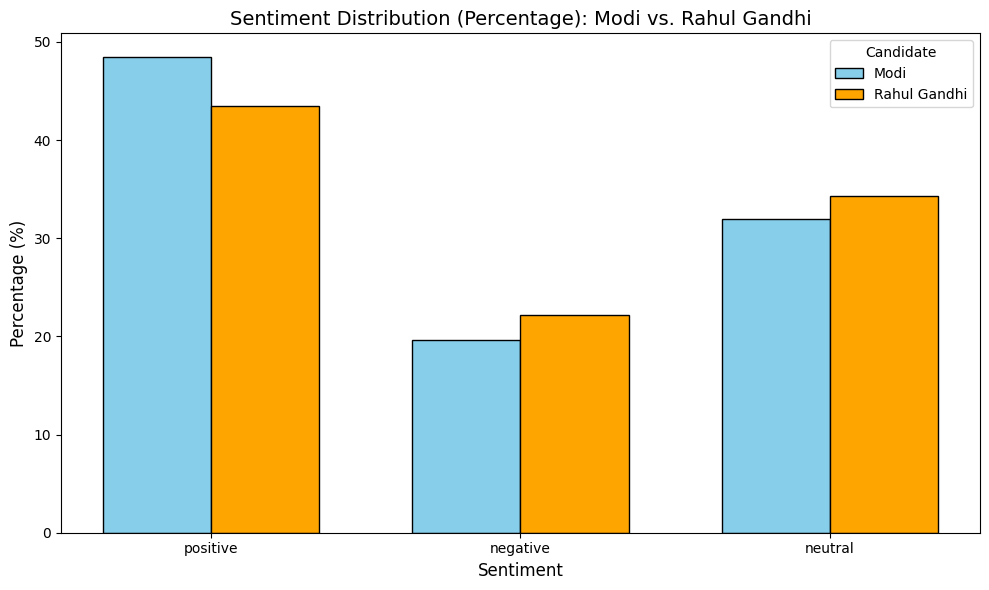

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure labels are consistent (lowercase)
modi['Label'] = modi['Label'].str.lower()
gandhi['Label'] = gandhi['Label'].str.lower()

# Check the value counts for both candidates
modi_counts = modi['Label'].value_counts()
gandhi_counts = gandhi['Label'].value_counts()

# Categories that should be present
categories = ['positive', 'negative', 'neutral']

# Reindex both counts to include all categories (filling missing categories with 0)
modi_counts = modi_counts.reindex(categories, fill_value=0)
gandhi_counts = gandhi_counts.reindex(categories, fill_value=0)

# Calculate the percentages for both candidates
modi_percentages = (modi_counts / modi_counts.sum()) * 100
gandhi_percentages = (gandhi_counts / gandhi_counts.sum()) * 100

# Set up the positions for the bars
x = np.arange(len(categories))  # Positions for categories
width = 0.35  # Width of the bars

# Create the grouped bar chart
plt.figure(figsize=(10, 6))

# Plot the bars for Modi and Gandhi (using percentages)
plt.bar(x - width/2, modi_percentages, width, label='Modi', color='skyblue', edgecolor='black')
plt.bar(x + width/2, gandhi_percentages, width, label='Rahul Gandhi', color='orange', edgecolor='black')

# Add labels, title, and legend
plt.title('Sentiment Distribution (Percentage): Modi vs. Rahul Gandhi', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(x, categories)  # Set category labels on x-axis
plt.legend(title='Candidate', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
